In [1]:
import json
import numpy as np
import matplotlib.pyplot as plt

In [31]:
with open("results.json", "r") as f:
    data = json.load(f)


In [35]:
score_names = ["score","percent_rescued","score_timestep","mean_drones_health","score_exploration","percent_drones_destroyed"]

scores = {name:{} for name in score_names}
for d in data:
    for name in score_names:
        if d["map_name"] not in scores[name]:
            scores[name][d["map_name"]] = []
        scores[name][d["map_name"]].append(d["rounds"][0][name])

In [36]:
def plot_score(scores, title:str):
    # Prepare data for boxplot
    keys = list(scores.keys())
    values = list(scores.values())
    
    # Create the boxplot
    plt.figure(figsize=(10, 10))
    boxplot = plt.boxplot(values, labels=keys, patch_artist=True, showmeans=False, 
                          boxprops=dict(facecolor='skyblue', color='blue'),
                          whis=[0, 100])
    
    # Add labels and title
    plt.title(title)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    
    # Rotate the x-axis labels
    plt.xticks(rotation=90)
    
    # Show the plot
    plt.tight_layout()
    plt.show()


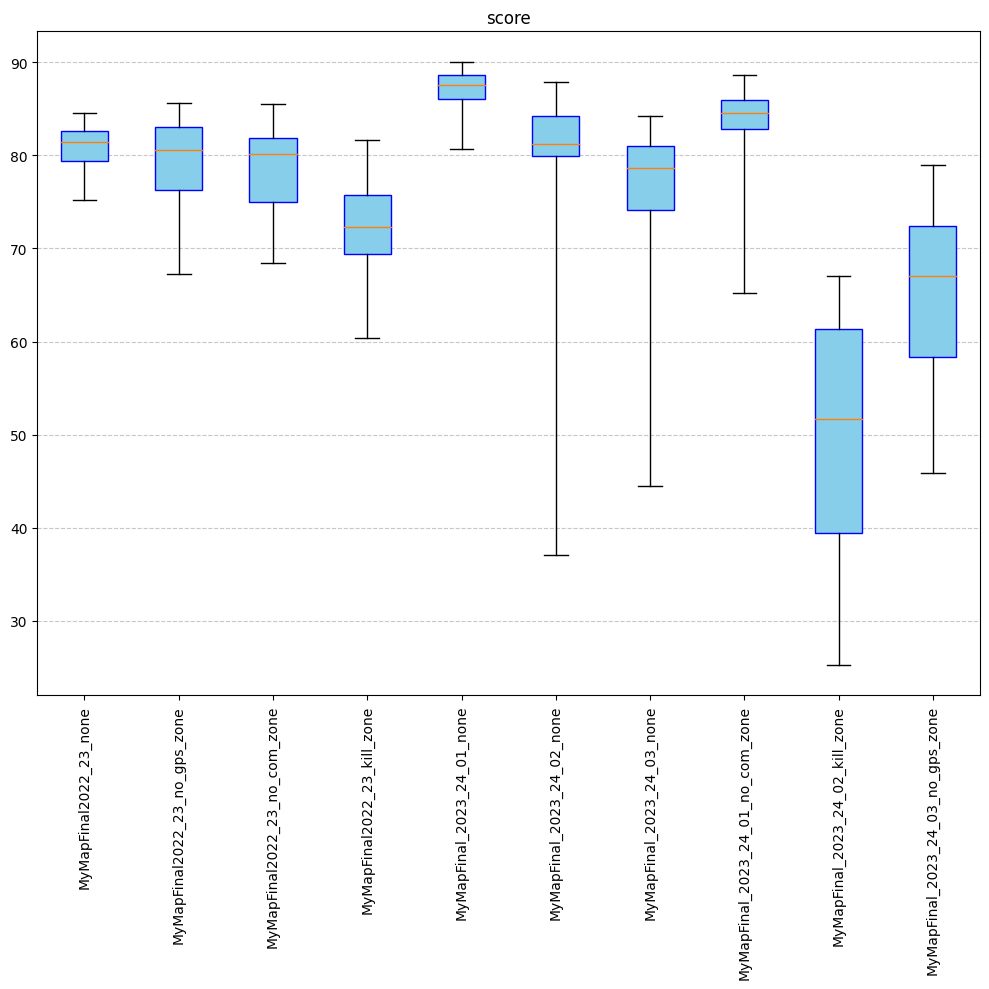

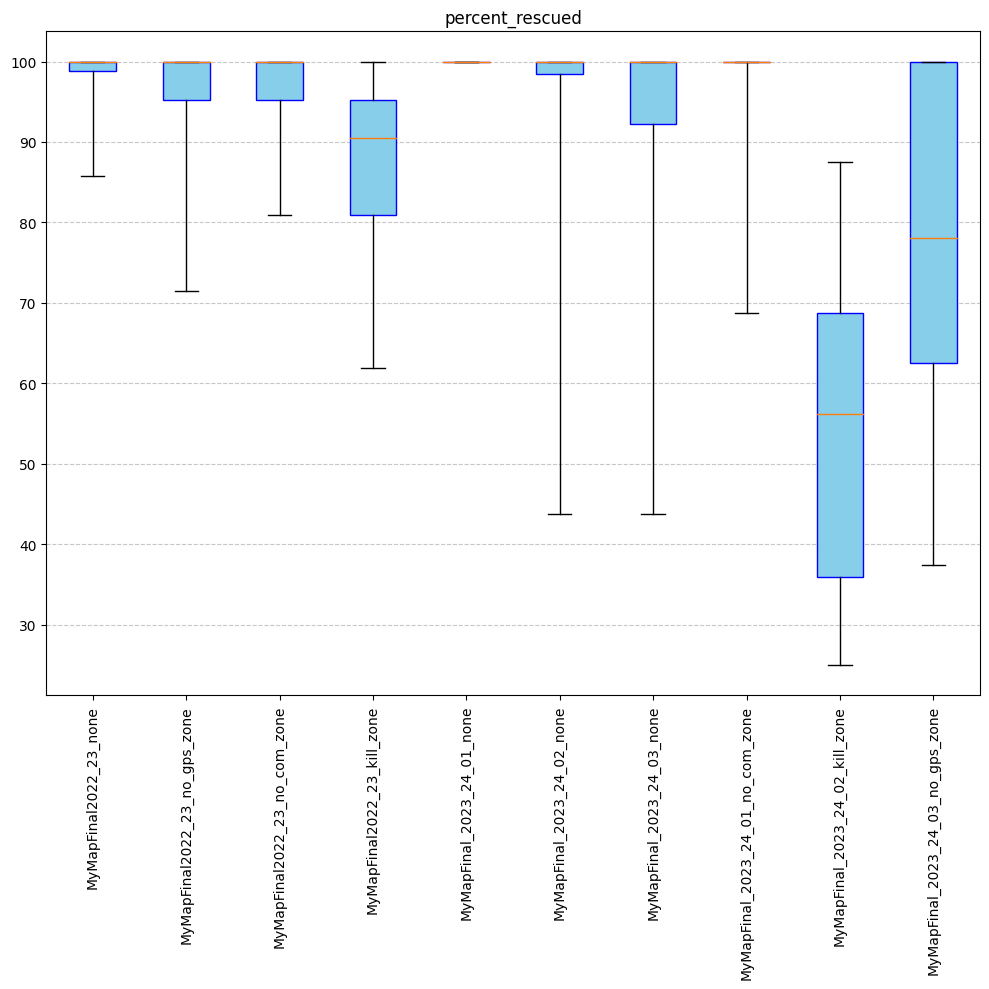

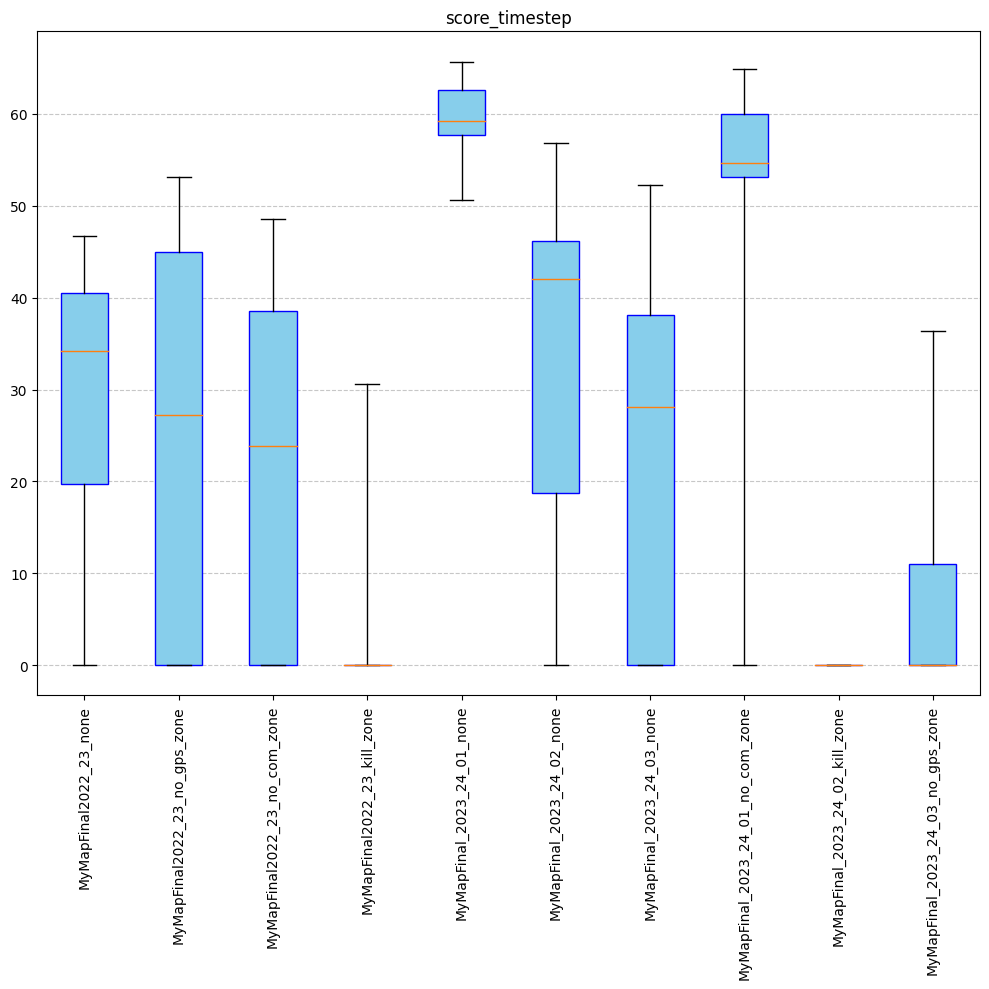

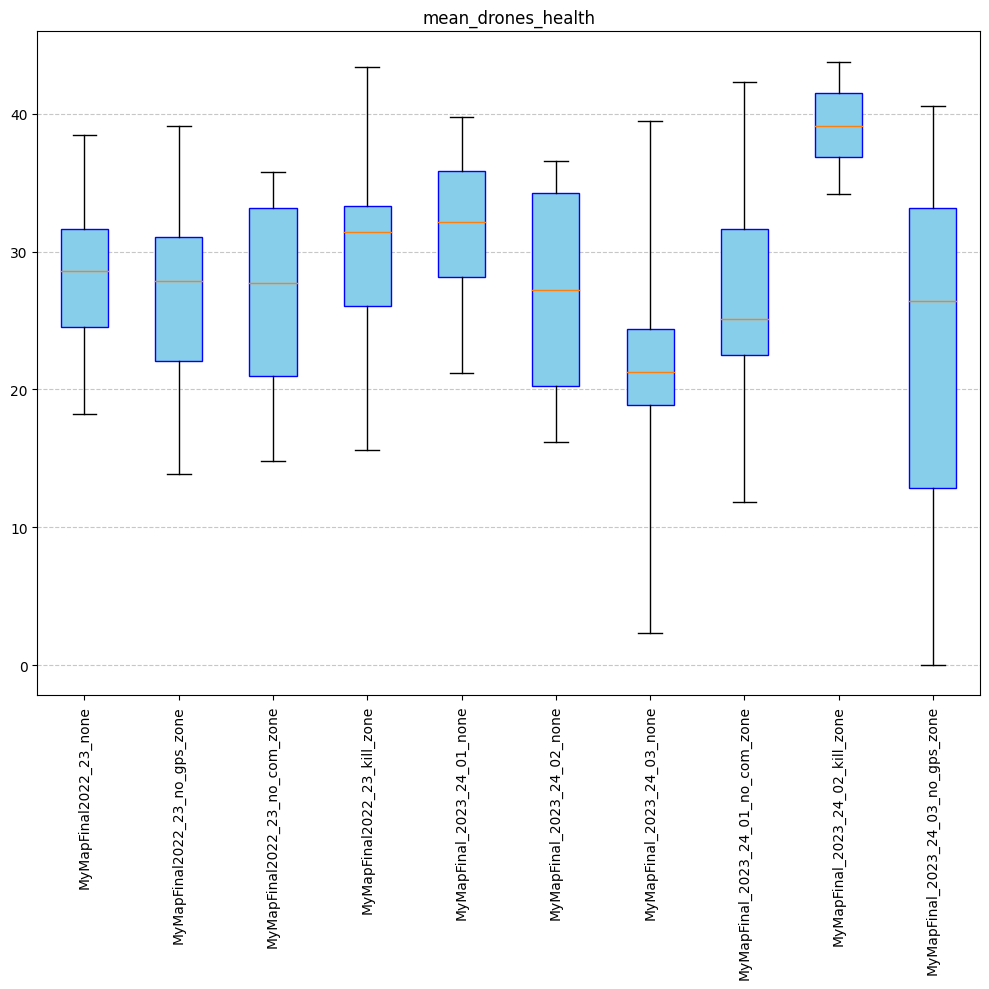

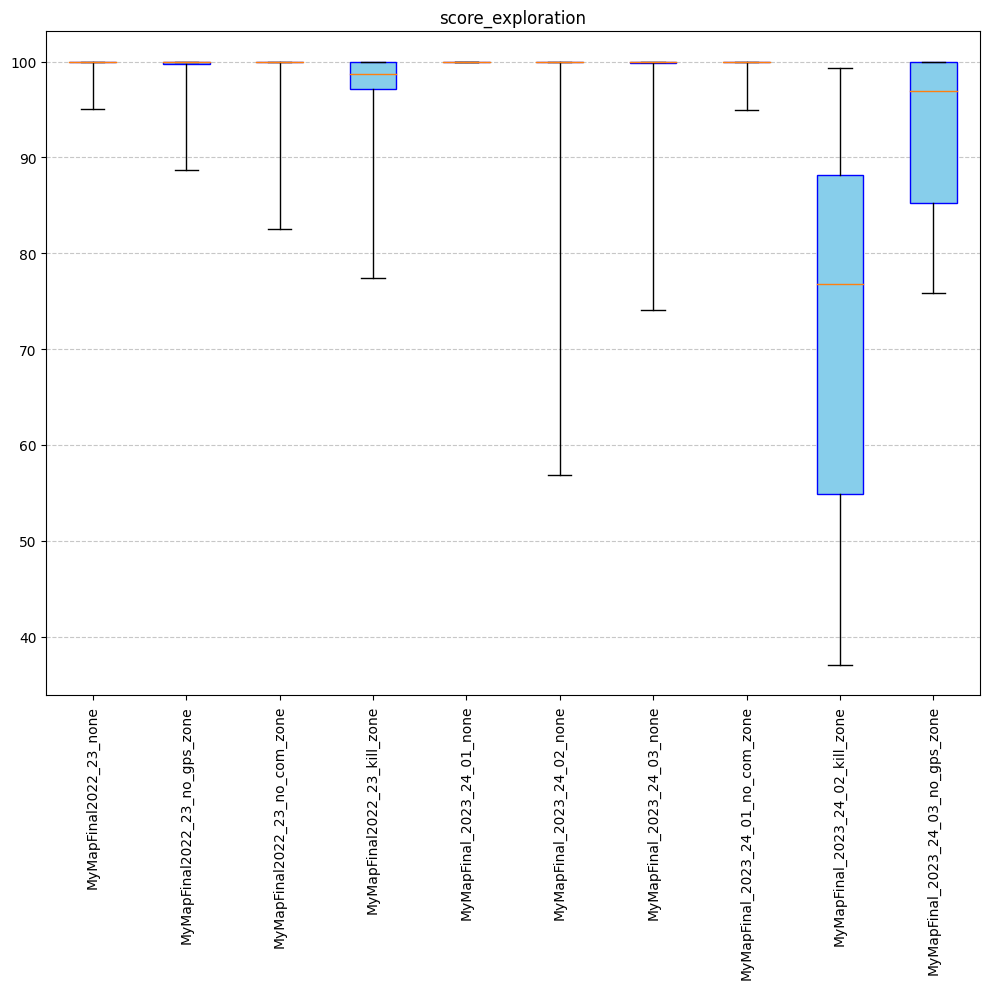

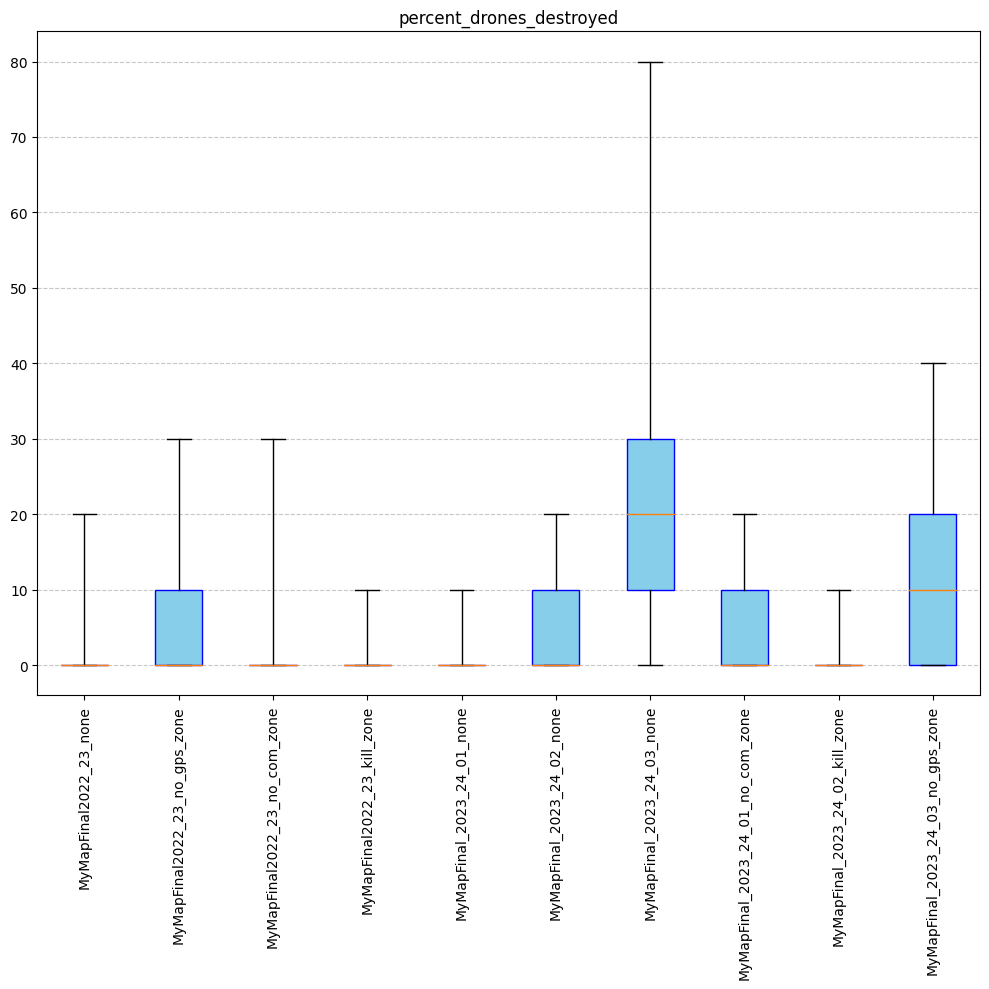

In [37]:
for name in score_names:
    plot_score(scores[name], name)